In [4]:
import numpy as np
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
np.random.seed(10)
from keras.datasets import mnist
from rcnn.load_data import rcnn_format
from keras.models import Sequential
from keras.layers import Dense

In [5]:
#以白底黑字顯示2*2吋大小的圖片
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show() 
    
#顯示圖片、真實值
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id,0])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

Load dataset: Face\pos
Train Data shape:(40, 112, 92, 3)
Test Data shape:(10, 112, 92, 3)
Train Label shape:(40, 5)
Test Label shape:(10, 5)


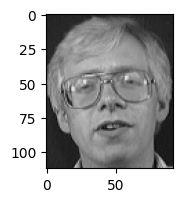

In [6]:
#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature, train_label),(test_feature, test_label) = rcnn_format('Face', (92, 112, 3))

# 訓練資料筆數與維度大小
# 測試資料筆數與維度大小
print("Train Data shape:" + str(train_feature.shape))
print("Test Data shape:" + str(test_feature.shape))
print("Train Label shape:" + str(train_label.shape))
print("Test Label shape:" + str(test_label.shape))

show_image(train_feature[0])   

訓練圖片


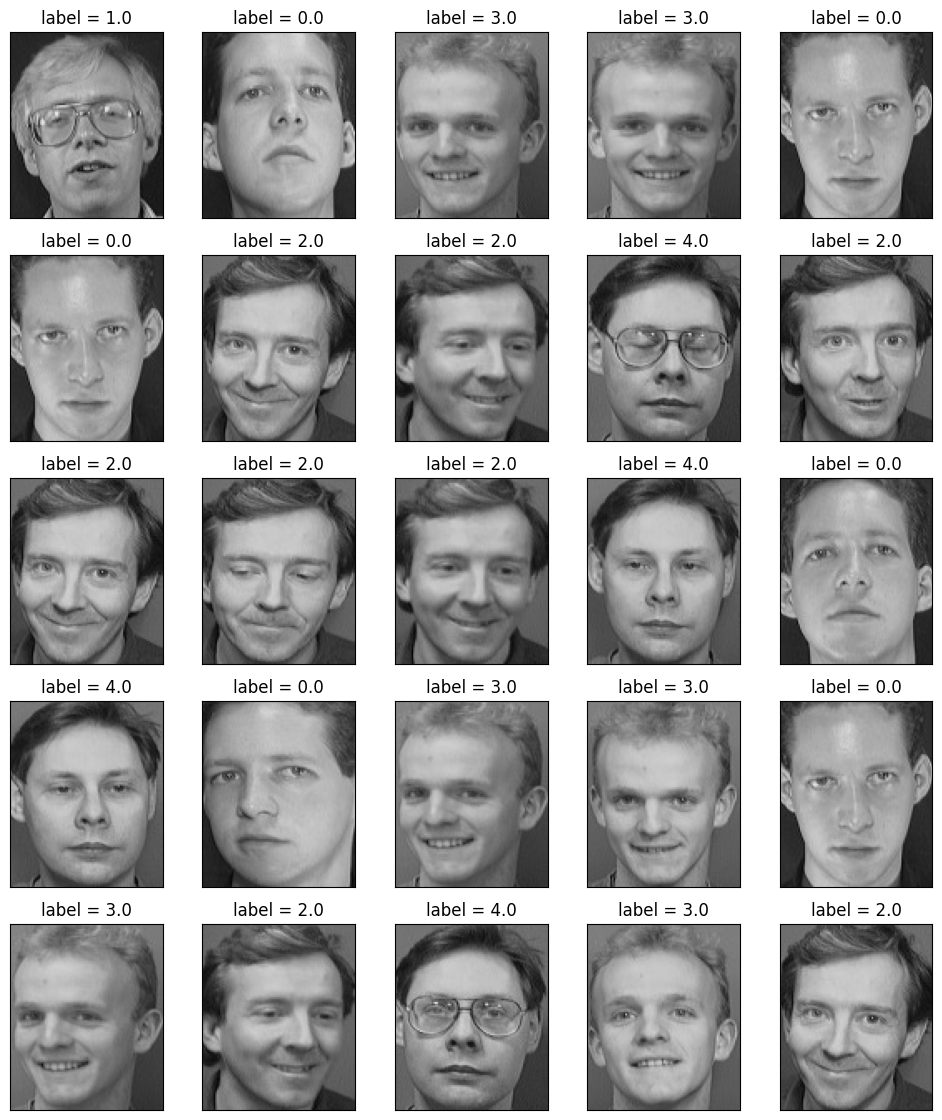

測試圖片


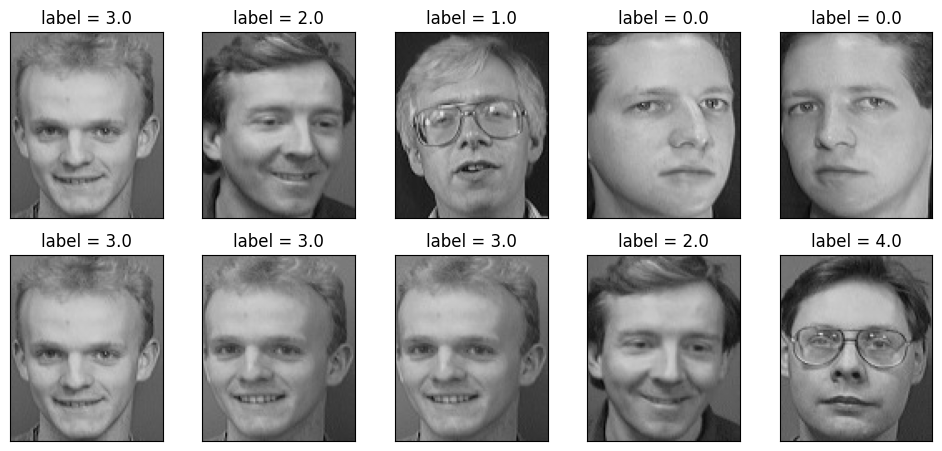

In [7]:
print('訓練圖片')
show_images_labels_predictions(train_feature,train_label,[],0,40)
print('測試圖片')
show_images_labels_predictions(test_feature,test_label,[],0,10)

In [8]:
#將 Features 特徵值轉換為 30912個 float 數字的 1 維向量
train_feature_vector = train_feature.reshape(len(train_feature), 30912).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 30912).astype('float32')
print(train_feature_vector.shape)

(40, 30912)


In [9]:
#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [11]:
#label 轉換為 One-Hot Encoding 編碼
#train_label_onehot = np_utils.to_categorical(train_label[:,0])
#test_label_onehot = np_utils.to_categorical(test_label[:,0])
train_label_onehot = to_categorical(train_label[:,0])
test_label_onehot = to_categorical(test_label[:,0])
print(test_label_onehot)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [12]:
#建立模型
model = Sequential()
#輸入層：30912, 隱藏層：512，輸出層：5
model.add(Dense(units=512, 
                input_dim=30912, 
                kernel_initializer='normal', 
                activation='relu'))
#model.add(Dense(units=512,  
#                kernel_initializer='normal', 
#                activation='relu'))
model.add(Dense(units=5, 
                kernel_initializer='normal', 
                activation='softmax'))
model.summary()  # 模型可視化

#定義訓練方式：選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15827456  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 15830021 (60.39 MB)
Trainable params: 15830021 (60.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [13]:
#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取4筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=20, batch_size=8,verbose=2)

Epoch 1/20


4/4 - 1s - loss: 1.6217 - accuracy: 0.1875 - val_loss: 1.4763 - val_accuracy: 0.3750 - 738ms/epoch - 184ms/step
Epoch 2/20
4/4 - 0s - loss: 1.4488 - accuracy: 0.2812 - val_loss: 1.4548 - val_accuracy: 0.3750 - 310ms/epoch - 77ms/step
Epoch 3/20
4/4 - 0s - loss: 1.3807 - accuracy: 0.3125 - val_loss: 1.4453 - val_accuracy: 0.5000 - 287ms/epoch - 72ms/step
Epoch 4/20
4/4 - 0s - loss: 1.3239 - accuracy: 0.5312 - val_loss: 1.4176 - val_accuracy: 0.6250 - 286ms/epoch - 72ms/step
Epoch 5/20
4/4 - 0s - loss: 1.2735 - accuracy: 0.5938 - val_loss: 1.3845 - val_accuracy: 0.6250 - 287ms/epoch - 72ms/step
Epoch 6/20
4/4 - 0s - loss: 1.2354 - accuracy: 0.7812 - val_loss: 1.3489 - val_accuracy: 0.7500 - 292ms/epoch - 73ms/step
Epoch 7/20
4/4 - 0s - loss: 1.1680 - accuracy: 0.8125 - val_loss: 1.2904 - val_accuracy: 0.7500 - 310ms/epoch - 77ms/step
Epoch 8/20
4/4 - 0s - loss: 1.1258 - accuracy: 0.8125 - val_loss: 1.2499 - val_accuracy: 0.6250 - 327ms/epoch - 82ms/step
Epoch 9/20
4/4 - 0s -

In [14]:
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

1/1 [==============================] - 0s 78ms/step - loss: 0.7170 - accuracy: 0.9000

準確率= 0.8999999761581421


In [15]:
#將模型儲存至 HDF5檔案中
model.save('Face_mlp_model.h5')

c:\01_MLP\01_MLP\mlpenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
